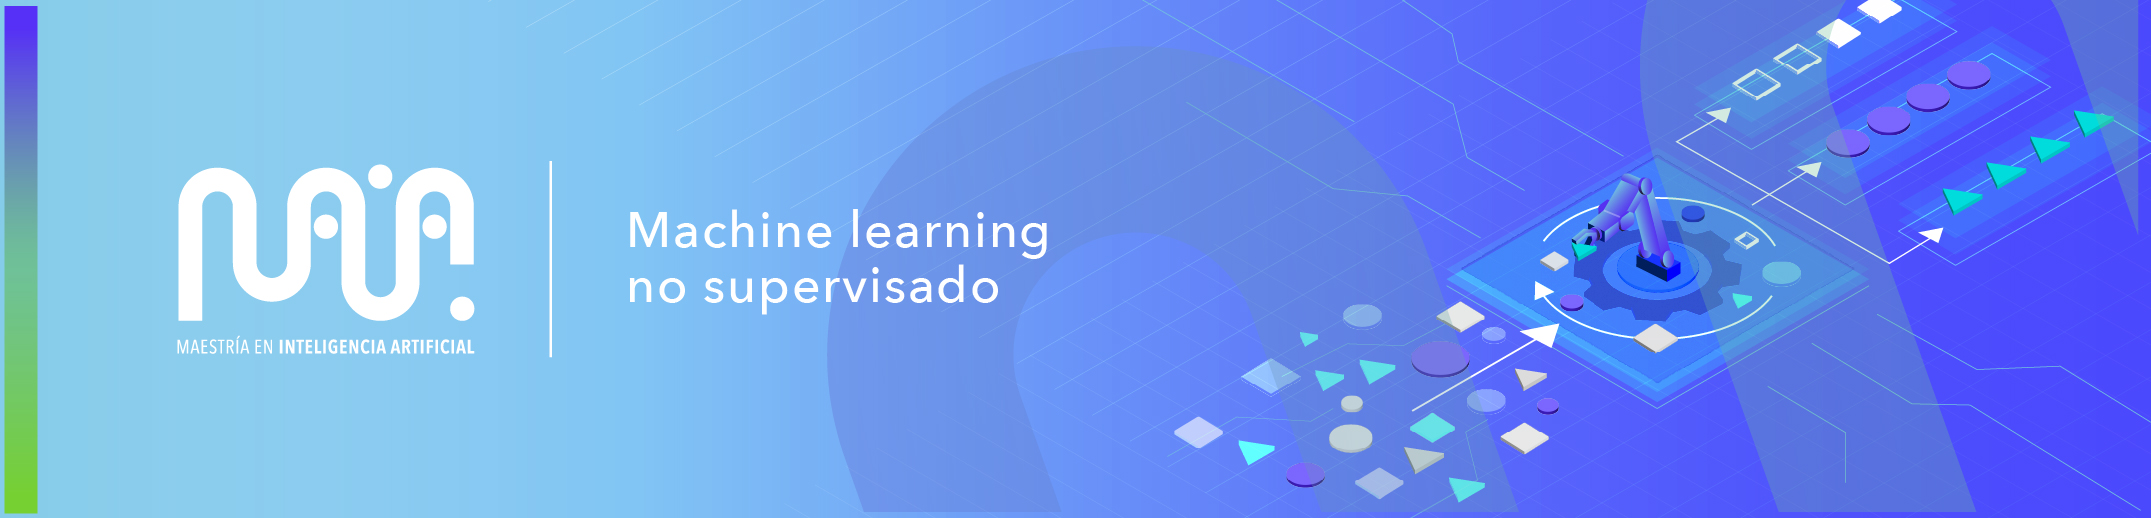

#  Visualización de imágenes con t-SNE

En este tutorial aprenderás cómo ejecutar el algoritmo de reducción de la dimensionalidad t-SNE, utilizando el conjunto de datos de imágenes Fashion MNIST. En ese sentido, utilizarás PCA para hacer una reducción de la dimensionalidad inicial, y luego aplicarás t-SNE sobre el resultado para obtener una visualización en dos dimensiones del conjunto de datos. Adicionalmente, verás cómo uno de los hiperparámetros del algoritmo afecta la representación resultante. En general, veremos cómo realizar los siguientes procesos:

1. [Importar las librerías necesarias.](#1.-Importación-de-librerías-requeridas)
2. [Cargar un conjunto de datos de imágenes.](#2.-Carga-de-datos)
3. [Aplicar PCA y t-SNE.](#3.-Reducción-de-la-dimensionalidad)
4. [Modificar el valor de perplejidad.](#4.-Modificación-del-valor-de-perplejidad)

---
 
    
<font size="3">**Contexto**  
<font size="2"> El algoritmo t-SNE se utiliza en conjuntos de imágenes para realizar una proyección en un espacio de dos dimensiones, manteniendo la estructura subyancente de los datos. Esto es útil para visulizar la distribución de las imágenes, así como para identificar grupos y patrones visuales. Para este tutorial también usaremos el conjunto de datos [Fashion MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist).

## 1. Importación de librerías requeridas

Importaremos las librerías `pandas`, `numpy`, y `scikit-learn`, así como la librería de visualización `matplotlib`. Usaremos la clase [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) para realizar una reducción de la dimensionalidad sobre nuestro conjunto de entrenamiento, y la clase [TSNE](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) para obtener una representación del resultado en dos dimensiones.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## 2. Carga de datos

Realizaremos la carga de datos usando la función de Pandas `read_csv()`, especificando la ruta y el separador del archivo:

In [3]:
data = pd.read_csv('data/fashion-mnist_test.csv', sep=',')
data.head()

NameError: name 'pd' is not defined

Para tener clases más intuitivas, crearemos un diccionario `class_names` utilizando la información del propio conjunto:

In [3]:
class_names = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

Al cargar únicamente el conjunto de entrenamiento, vamos a definir directamente el conjunto de variables independientes `x_train` y la variable objetivo `y_train`:

In [4]:
x_train = data.drop("label", axis=1)
y_train = data["label"]

Ahora veremos una muestra del conjunto de imágenes. Utilizaremos la función `reshape()` y la función `imshow()` para mostrar las imágenes:

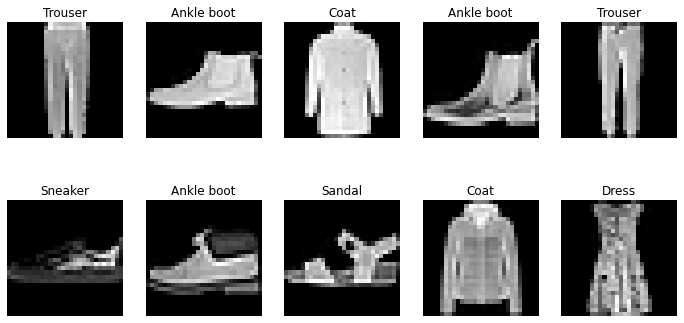

In [5]:
random_sample = np.random.randint(0, len(data) + 1, size=10)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train.iloc[random_sample[i]].values.reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[random_sample[i]]])
    plt.axis('off')
plt.show()

## 3. Reducción de la dimensionalidad

Generalmente se combinan otros algoritmos de reducción de la dimensionalidad junto con t-SNE para visualizar los datos en espacios de baja dimensionalidad. Por ejemplo, primero aplicaremos PCA para intentar reducir el ruido del conjunto, y luego aplicaremos t-SNE (que es computacionalmente más costoso) sobre el resultado. En ese sentido, utilizaremos la clase `PCA()`:

In [6]:
pca = PCA(n_components=30)
x_reduced = pca.fit_transform(x_train)

Para visualizar el resultado de aplicar PCA, utilizaremos el método `inverse_transform()`:

In [7]:
x_recovered = pca.inverse_transform(x_reduced)

Y graficaremos una muestra de diez elementos:

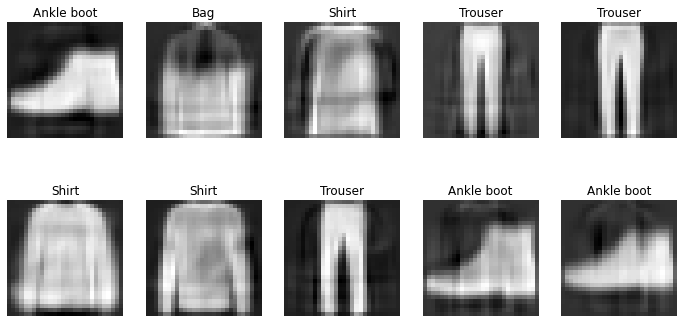

In [8]:
random_sample = np.random.randint(0, len(data) + 1, size=10)

plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_recovered[random_sample[i]].reshape(28, 28), cmap='gray')
    plt.title(class_names[y_train[random_sample[i]]])
    plt.axis('off')
plt.show()

### t-SNE con parámetros por defecto
A continuación, aplicaremos el algoritmo t-SNE sobre el conjunto reducido `x_reduced`, convirtiendo el resultado en un DataFrame. Por defecto, la clase `TSNE()` retorna una representación de dos dimensiones:

In [9]:
tsne = TSNE(random_state=0, verbose=1)
x_tsne = pd.DataFrame(tsne.fit_transform(x_reduced))

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 3.014s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 312.790520
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.375923
[t-SNE] KL divergence after 1000 iterations: 1.432210


Finalmente, utilizaremos el resultado almacenado en `x_tsne` para obtener una gráfica en dos dimensiones. Si usamos la variable objetivo para agrupar los elementos, también tendremos más información sobre la distribución de las clases en el espacio:

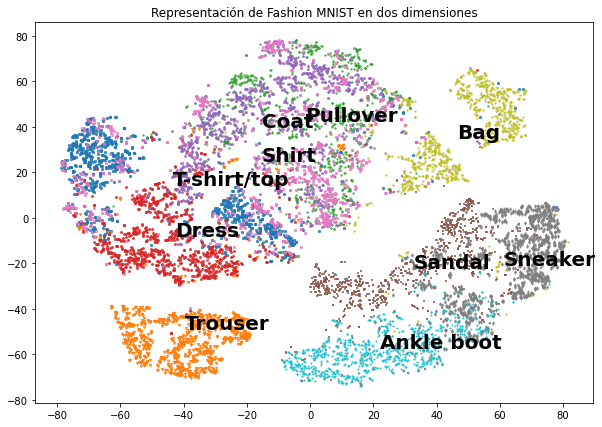

In [10]:
MARKER = ['o', 'v', '1', 'p' ,'*', '+', 'x', 'd', '4', '.']
plt.figure(figsize=(10, 7))
plt.title('Representación de Fashion MNIST en dos dimensiones');
for i in range(10):
    selections = x_tsne.iloc[y_train[y_train==i].index]
    plt.scatter(selections[0], selections[1], alpha=0.8, marker=MARKER[i], s=5)
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(class_names[i]), fontdict={'weight': 'bold', 'size': 20})
plt.show()

## 4. Modificación del valor de perplejidad 

La perplejidad (parámetro `perplexity`) es un hiperparámetro de t-SNE que relaciona el número de vecinos más cercanos utilizado en el entrenamiento. En el caso anterior utilizamos el valor por defecto de **30**, aunque usualmente se recomienda un valor entre 5 y 50. Veremos el resultado al utilizar un valor más bajo:

In [11]:
tsne = TSNE(perplexity=5, random_state=0, verbose=1)
x_tsne = pd.DataFrame(tsne.fit_transform(x_reduced))

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.001s...
[t-SNE] Computed neighbors for 10000 samples in 2.861s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 191.072090
[t-SNE] KL divergence after 250 iterations with early exaggeration: 91.252678
[t-SNE] KL divergence after 1000 iterations: 1.733828


Y visualizaremos el resultado:

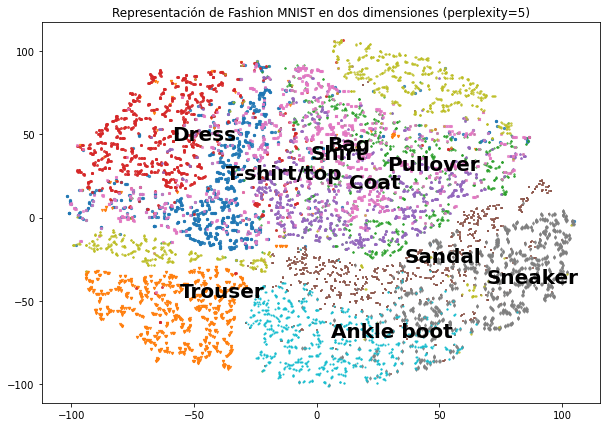

In [12]:
plt.figure(figsize=(10, 7))
plt.title('Representación de Fashion MNIST en dos dimensiones (perplexity=5)');
for i in range(10):
    selections = x_tsne.iloc[y_train[y_train==i].index]
    plt.scatter(selections[0], selections[1], alpha=0.8, marker=MARKER[i], s=5)
    x, y = selections.mean(axis=0)
    plt.text(x, y, str(class_names[i]), fontdict={'weight': 'bold', 'size': 20})
plt.show()

## Cierre

En este tutorial hemos utilizado la clase `PCA()` y `TSNE()` para obtener una visualización en dos dimensiones de un conjunto de datos de imágenes. Específicamente, realizamos una reducción de la dimensionalidad con PCA para reducir el ruido del conjunto original y obtener los componentes más importantes, aplicando el algoritmo t-SNE sobre el resultado. Finalmente, modificamos el hiperparámetro `perplexity` y visualizamos el resultado sobre el conjunto reducido.

<font size="3">**Hands-on**  


* Los valores de perplejidad recomendados son entre 5 y 50. Intenta cambiar el parámetro `perplexity` a otros valores. ¿Qué ocurre con valores por fuera del rango recomendado? 
* Para este conjunto realizamos una reducción inicial de la dimensionalidad con PCA. Intenta aplicar t-SNE directamente sobre el conjunto original. ¿Hay alguna diferencia en el tiempo de entrenamiento y en los resultados de la visualización?

---
*Creado por: Nicolás Díaz*  
*Revisado por: Haydemar Nuñez*  
*Versión de: Octubre 20, 2023*  
*Universidad de los Andes*   